# Image Encryption Using Finite Group

Consists of 4 parts
1. Key Expansion
2. Diffussion I
3. Self Confussion
4. Diffussion II

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy
import math

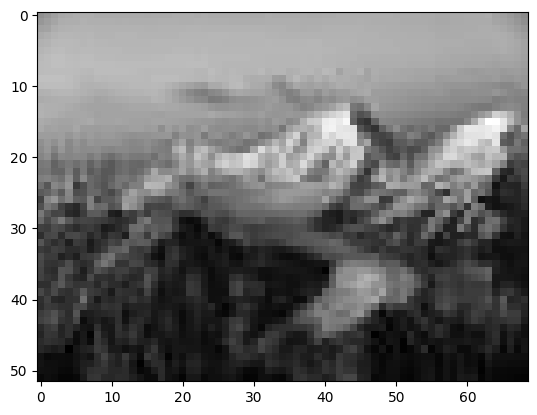

In [ ]:
inputkey = '7d04f29046ecd13a6d06f9934a529205'

img = cv2.imread('sample 1.jpg') #some image of any shape
P = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(P, cmap="gray")

In [ ]:
def hexadecimaltobinary(inputkey):
    ini_string='0x'+inputkey  # adding the prefix '0x' to convert to binary
    key=bin(int(ini_string, 16))[2:].zfill(len(inputkey)*4)  # binary of the hexadecimal and fill the front with zeros
    key=list(map(int, key)) # converting string to list of integers
    L = len(key)
    return numpy.array(key)
key= hexadecimaltobinary(inputkey)
key

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
def imageshape(P):
    return P.shape[0], P.shape[1]
M, N = imageshape(img)
M, N

(52, 69)

## Encryption

### Key Expansion

In [ ]:
def KeyExpansion(key):

    L = len(key)
    # initialising t
    t=[]
    for i in range(L-3):
        t.append(8*key[i] + 4*key[i+1] + 2*key[i+2] + 1*key[i+3])


    # Initialising v
    v = []
    for i in range(L-7):
        v.append(128*key[i] + 64*key[i+1] + 32*key[i+2] + 16*key[i+3] + 8*key[i+4] + 4*key[i+5] + 2*key[i+6] + 1*key[i+7])

    g = []

    #for g
    for i in range(1, L-2):
        #print(i)
        g.append((t[L-3-i]+1)%17)
        #print(L-3-i, t[L-3-i]+1)

    #for h
    h = []
    h.append(0)
    for i in range(1, L-7):
        h.append((v[i]+1)%257)


    h[0] = (h[-1]*h[-2]*h[-3])%257
    u = numpy.zeros(shape=M*N + 1, dtype=numpy.longdouble)
    ul = -1.13135
    ur =  1.40583
    u[0]=ul + (ur - ul) * (h[0]/257) # u[0]
    u[1]=ul + (ur - ul) * (((h[0]*h[1])%257)/257) # u[1]


    for i in range(((g[0]*g[1]*g[2])%17)):
        a = (1.4) * ((u[i+1])**2)
        b = (0.3) * (u[i])
        u[i+2]=((1) - (a) + (b))
    n = numpy.zeros(shape=L-7)

    for j in range (1, L-9):
        n[j] = (g[j]*g[j+1]*g[j+2])%17
        #print((g[j]*g[j+1]*g[j+2])%17)
        u[0] = ul + (ur-ul)*(((h[j]*h[j+1])%257)/257)
        #print(ul + (ur-ul)*(((h[j]*h[j+1])%257)/257))
        u[1] = (u[int(n[j-1])+1])
        #print((u[int(n[j-1])+1]) * (ur-ul) + ul)
        for i in range(int(n[j])):
            #print('a: ',1.4 *((u[i+1])**2))
            a = 1.4 * ((u[i+1])**2)
            #print('b: ',0.3 * (u[i]))
            b = 0.3 * (u[i])
            u[i+2] = (1 - a + b)
            #u[i+2]=((((1 - a + b) - ul)/(ur - ul))*(ur-ul)) + ul
            if (u[i+2] < ul ):
                u[i+2] = 2*ul-u[i+2]

    for j in range (1, L-8):
        n[j] = (g[j]*g[j+1]*g[j+2])%17
        u[0] = ul + (ur-ul)*(((h[-1]*h[0])%257)/257)
        u[1] = u[(L-8)+1]
        for i in range(int(n[L-8] + (g[L-7]*g[L-6]*g[L-5])%17 + (g[L-6]*g[L-5]*g[L-4])%17)):
            #print(i)
            a = 1.4 * ((u[i+1])**2)
            b = 0.3 * (u[i])
            u[i+2]=(1 - a + b)
            if (u[i+2] < ul ):
                u[i+2] = 2*ul-u[i+2]

    for i in range(M*N-2):
        a = 1.4 * ((u[i+1])**2)
        b = 0.3 * (u[i])
        u[i+2]=(1 - a + b)
        if (u[i+2] < ul ):
            u[i+2] = 2*ul-u[i+2]

    #The final chaotic State

    w=[]
    X=numpy.zeros((M,N),dtype=int)
    Y=numpy.zeros((M,N),dtype=int)

    for i in range(M*N):
        w.append(math.floor((2+u[i])*1e10) % 2**16)
        row=int(math.floor(i/N))
        col=i%N
        X[row,col]=int(math.floor(w[i]/256))
        Y[row,col]=w[i] % 256


    return X, Y

X, Y = KeyExpansion(key)
X, Y

(array([[ 25, 200,  68, ...,  81,  19, 104],
        [140, 120, 122, ..., 162, 222,  87],
        [ 29,  26, 158, ..., 107,  28,  70],
        ...,
        [102, 221, 104, ...,  17, 233, 224],
        [ 36, 120,  42, ...,  22, 124, 247],
        [116,  66,  73, ..., 114, 173, 107]]),
 array([[250,   0, 151, ..., 165, 102,  50],
        [135, 238,  58, ..., 146, 144,  73],
        [ 47, 243, 100, ..., 130, 168, 201],
        ...,
        [ 91, 203, 167, ..., 107, 174, 232],
        [ 51,  77, 225, ..., 219, 176,  80],
        [173, 240, 179, ..., 154, 192,  10]]))

### Difussion I

In [ ]:
def Diffussion1(P, X):
    M , N = P.shape[0], P.shape[1]


    Q = numpy.zeros(shape=[M,N])
    for i in range(M):
        for j in range(N):
            Q[i, j] = (P[i, j] + 1)%257

    Z=numpy.zeros(shape=[M,N],dtype=int)
    #print(Z)
    for i in range(M):
        for j in range(N):
            Z[i,j]=int(X[i,j]+1)%257

    R = numpy.zeros(shape=[M, N])
    for i in range(M):
        for j in range(N):
            #print(i, j, R[i, j])
            if(i == 0 and j == 0):
                #print(i, j, longdouble(Q[i, j]) , longdouble(Z[i, j]))
                R[i, j] = ((Q[i, j]) * (Z[i, j]))%257
            elif(i ==0 and j in range(N)):
                #print(i, j, (Q[i, j]) , (R[0, j-1]) , (Z[0, j]))
                R[i, j] = ((Q[i, j]) * (R[0, j-1]) * (Z[0, j]))%257
            elif(i == 1 and j == 0):
                #print(longdouble(Q[i, j]) , longdouble(R[0, 0]) , longdouble(Z[1, 0]))
                R[i, j] = ((Q[i, j]) * (R[i-1, j]) * (R[i-1, N-1]) * (Z[1, 0]))%257
            elif(i in range(M) and j == 0):
                R[i, j] = ((Q[i, j]) * (R[i - 1, 0]) * (Z[i, j]))%257
            elif(i in range(M) and j in range(N)):
                #print(i, j, longdouble(Q[i, j]) , longdouble(R[i - 1, j]) , longdouble(R[i, j-1]),  longdouble(Z[1, 0]))
                R[i, j] = ((Q[i, j]) * (R[i - 1, j]) * (R[i, j-1])* (Z[i, j]))%257

    for i in range(M):
        for j in range(N):
            R[i, j] = R[i, j] - 1

    return R.astype(int)
R = Diffussion1(P, X)
R

array([[ 84, 255, 250, ...,  40, 188, 136],
       [ 64, 107,  50, ..., 121, 117, 206],
       [219, 136, 240, ...,  38,  79,  43],
       ...,
       [185, 164,  10, ...,   6, 142,  22],
       [ 87,  74, 170, ..., 157, 126, 234],
       [239, 136, 204, ...,  71, 110, 122]])

### Self Confussion

In [ ]:
def splitbit(B):
    # Example input matrix B as decimal values
    #B = R

    # Convert B to 8-bit unsigned integer values
    B = B.astype(numpy.uint8)

    # Extract the higher 4 bits and lower 4 bits of each element of B
    higher_bits = (B >> 4) & 0x0F
    lower_bits = B & 0x0F

    # Increase each of the higher 4 bits and lower 4 bits by one
    # higher_bits += 1
    # lower_bits += 1

    # Construct the output matrix D by interleaving the higher and lower bits
    D = numpy.zeros((B.shape[0], 2 * B.shape[1]), dtype=numpy.uint8)
    D[:, ::2] = higher_bits
    D[:, 1::2] = lower_bits

    # print("Input matrix B:\n", B)
    # print("Output matrix D:\n", D)

    return D

def mergebit(D):
    M, N = D.shape[0], D.shape[1] //2

    E = numpy.zeros((M, N), dtype=numpy.uint8)

    # D = D - 1
    for i in range(M):
        for j in range(N):
            # Merge two adjacent elements in the current column
            byte = (D[i, 2*j] << 4) | D[i, 2*j+1]
            E[i, j] = byte
    return E

In [ ]:
def SelfConfussion(R, Y):
    M , N = R.shape[0], R.shape[1]


    B = numpy.rot90(R, 2).astype(int)


    '''# Split the higher 4 bits and the lower 4 bits of each element of B
    higher_bits = numpy.right_shift(B, 4)
    lower_bits = numpy.bitwise_and(B, 0b00001111)

    # Increase each element of higher_bits and lower_bits by 1
    higher_bits = higher_bits + 1
    lower_bits = lower_bits + 1

    # Construct the matrix D by concatenating higher_bits and lower_bits horizontally
    D = numpy.hstack((higher_bits, lower_bits))'''

    #B = B + 1

    D = splitbit(B)
    #print(D)
    U = splitbit(Y.astype(int))

    # print(U)
    # U = U + 1
    # print(U)

    U_rotated = numpy.rot90(U, 2)
    # print(U)
    # print(U_rotated)
    V = (U_rotated * U) % 16

    #print(V)


    # outD = numpy.zeros(shape=(D.shape[0], D.shape[1]))
    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            #print(i, j, D[i, j] , V[i, j])
            D[i, j] = (D[i, j] + V[i, j]) % 16
            #print(D[i, j])

    E = mergebit(D).astype(int)

    #E = E - 1
    return E
E = SelfConfussion(R, Y)
E

array([[218, 110, 230, ..., 163, 130,  83],
       [237, 120, 175, ...,  54, 154,  18],
       [ 24, 172,  46, ..., 142, 132, 246],
       ...,
       [255,  77, 110, ..., 114, 106, 251],
       [122, 122,  50, ...,  83,  11, 112],
       [207,  92, 150, ..., 228, 255,  90]])

### Difussion II

In [ ]:
def modInverse(a, m):
    x, y, gcd = extended_euclidean_algorithm(a, m)
    if gcd != 1:
        raise ValueError("Inverse does not exist")
    return x % m

def extended_euclidean_algorithm(a, b):
    if b == 0:
        return 1, 0, a
    else:
        x, y, gcd = extended_euclidean_algorithm(b, a % b)
        return y, x - (a // b) * y, gcd


In [ ]:
def diffussion2(E, X):

    M , N = R.shape[0], R.shape[1]

    E = E + 1
    #print(E)

    Z = X +1

    W=numpy.zeros(shape=[M,N])

    for i in range(M):
        for j in range(N):
            W[i,j]=modInverse(Z[i,j], 257)

    F = numpy.zeros(shape=[M, N])
    for i in range(M):
        for j in range(N):
            if(i == 0 and j == 0):
                #print(i, j, E[i, j], W[i, j])
                F[i, j] = ((E[i, j]) * (W[i, j]))%257
                #print(F[i, j])
            elif(i ==0 and j in range(N)):
                #print(i, j, E[i, j], E[i, j-1], modInverse(E[i, j-1], 257), W[i, j])
                F[i, j] = ((E[i, j]) * modInverse(E[i, j-1], 257) * (W[i, j]))%257
            elif(i == 1 and j == 0):
                #print(i, j, E[i, j], E[i-1, j], modInverse(E[i-1,j], 257), E[i-1, N-1], modInverse(E[i-1, N-1], 257), (W[1, j]))
                F[i, j] = ((E[i, j]) * modInverse(E[i-1,j], 257) * modInverse(E[i-1, N-1], 257) *(W[1, j]))%257
            elif(i in range(M) and j == 0):
                F[i, j] = ((E[i, j]) * modInverse(E[i-1,j], 257) * (W[i, j]))%257
            elif(i in range(M) and j in range(N)):
                #print('i', i, 'j', j,'E[i, j]',  E[i, j] ,'E[i-1, j]', E[i-1, j], modInverse(E[i-1,j],257), 'E[i, j-1]', E[i, j-1], modInverse(E[i,j-1],257), (W[i,j]))
                F[i, j] = ((E[i, j]) * modInverse(E[i-1,j],257) *  modInverse(E[i,j-1],257)* (W[i,j]))%257
            #print(i, j, F[i, j])

    C = (F - 1).astype(int)

    return C

#print(E, X)

C = diffussion2(E, X)
C

array([[215, 204, 191, ...,  71, 237,  61],
       [110, 159,  99, ..., 101,  85, 204],
       [150,  46, 154, ..., 232,  68,  65],
       ...,
       [128,   5,  43, ..., 100,   8,  33],
       [211,  75, 121, ...,   5, 246,  33],
       [ 48, 126,  71, ...,  20, 219,  25]])

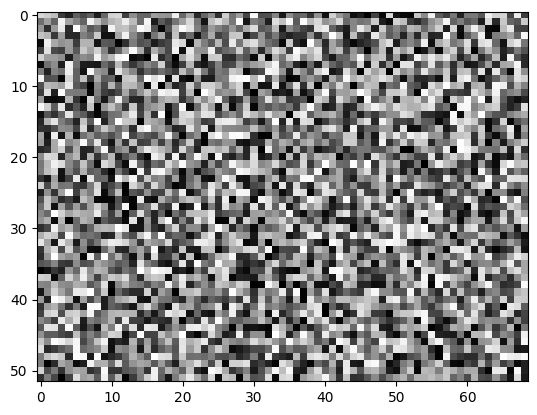

In [ ]:
plt.imshow(C, cmap = "gray")

## Decryption

### Difussion II

In [ ]:
def reverse_Diffusion2(C, X):

    M, N = imageshape(C)

    F = C + 1

    Z = X + 1

    W = numpy.zeros(shape=[M, N])

    for i in range(M):
        for j in range(N):
            W[i,j] = modInverse(Z[i,j], 257)

    E = numpy.zeros(shape=[M, N])
    for i in range(M):
        for j in range(N):
            if(i == 0 and j == 0):
                E[i, j] = (F[i, j] * modInverse(W[i, j], 257)) % 257
            elif(i == 0 and j in range(N)):
                #print(F[i, j] , E[i, j-1], modInverse(W[i, j], 257))
                E[i, j] = (F[i, j] * E[i, j-1] * modInverse(W[0, j], 257)) % 257
            elif(i == 1 and j == 0):
                #print(F[i, j] , E[i-1, j] , E[i-1, N-1] , modInverse(W[i, j], 257))
                E[i, j] = (F[i, j] * E[i-1, j] * E[i-1, N-1] * modInverse(W[i, j], 257)) % 257
            elif(i in range(M) and j == 0):
                E[i, j] = (F[i, j] * E[i-1, j] * modInverse(W[i, j], 257)) % 257
            elif(i in range(M) and j in range(N)):
                E[i, j] = (F[i, j] * E[i-1, j] * E[i, j-1] * modInverse(W[i, j], 257)) % 257

    E = (E - 1).astype(int)

    return E
E = reverse_Diffusion2(C, X)
E

array([[218, 110, 230, ..., 163, 130,  83],
       [237, 120, 175, ...,  54, 154,  18],
       [ 24, 172,  46, ..., 142, 132, 246],
       ...,
       [255,  77, 110, ..., 114, 106, 251],
       [122, 122,  50, ...,  83,  11, 112],
       [207,  92, 150, ..., 228, 255,  90]])

### Self Confussion

In [ ]:
def reverse_SelfConfussion(E, Y):
    M , N = E.shape[0], E.shape[1]


    #B = numpy.rot90(E, 2).astype(int)

    #E = E + 1

    D = splitbit(E)

    U = splitbit(Y.astype(int))

    # print(U)
    # U = U + 1
    # print(U)

    U_rotated = numpy.rot90(U, 2)
    # print(U)
    # print(U_rotated)
    V = (U_rotated * U) % 16

    #print(V)

    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            #print(i, j, D[i, j] , V[i, j])
            D[i, j] = (D[i, j] - V[i, j]) % 16
            #print(D[i, j])

    R = mergebit(D).astype(int)

    R = numpy.rot90(R, 2).astype(int)

    #R = R - 1

    return R

R = reverse_SelfConfussion(E, Y)
R

C:\Users\sanja\AppData\Local\Temp\ipykernel_12980\4242946719.py:27: RuntimeWarning: overflow encountered in ubyte_scalars
  D[i, j] = (D[i, j] - V[i, j]) % 16


array([[ 84, 255, 250, ...,  40, 188, 136],
       [ 64, 107,  50, ..., 121, 117, 206],
       [219, 136, 240, ...,  38,  79,  43],
       ...,
       [185, 164,  10, ...,   6, 142,  22],
       [ 87,  74, 170, ..., 157, 126, 234],
       [239, 136, 204, ...,  71, 110, 122]])

### Difussion I

In [ ]:
def reverse_diffusion1(arr, X):
    M, N = arr.shape[0], arr.shape[1]
    Z = X + 1
    R = arr + 1
    Q = numpy.zeros(shape=(M, N))
    for i in range(M):
        for j in range(N):
            if (i== 0 and j == 0):
                Q[i, j] = (R[i, j] * modInverse(Z[i, j], 257)) % 257
            elif (i == 0 and j in range(N)):
                Q[i, j] = (R[i, j] * modInverse(R[i, j-1], 257) * modInverse(Z[i, j], 257)) %257
            elif (i == 1 and j == 0) :
                #print('i', i,'j', j,'R[i, j]', R[i, j], 'R[i-1, j]', R[i-1, j], 'R[i-1, N-1]', R[i-1, N-1], 'Z[i, j]', Z[i, j])
                Q[i, j] = (R[i, j] * modInverse(R[i-1, j], 257) * modInverse(R[i-1, N-1], 257) * modInverse(Z[i, j], 257)) %257
            elif (i in range(M) and j == 0):
                Q[i, j] = (R[i, j] * modInverse(R[i-1, j], 257) * modInverse(Z[i, j], 257)) % 257
            elif (i in range(M) and j in range(N)):
                Q[i, j] = (R[i, j] * modInverse(R[i-1, j], 257) * modInverse(R[i, j-1], 257) * modInverse(Z[i, j], 257))% 257
    return Q.astype(int)
P = reverse_diffusion1(R, X)
P

C:\Users\sanja\AppData\Local\Temp\ipykernel_12980\3520871486.py:18: RuntimeWarning: overflow encountered in long_scalars
  Q[i, j] = (R[i, j] * modInverse(R[i-1, j], 257) * modInverse(R[i, j-1], 257) * modInverse(Z[i, j], 257))% 257


array([[112, 117, 123, ..., 119, 114, 108],
       [117, 122, 127, ..., 122, 117, 111],
       [124, 126, 132, ..., 125, 121, 117],
       ...,
       [ 23,  19,  19, ...,  18,  18,  17],
       [ 21,  20,  19, ...,  15,  15,  14],
       [ 15,  19,  17, ...,  14,  13,  12]])

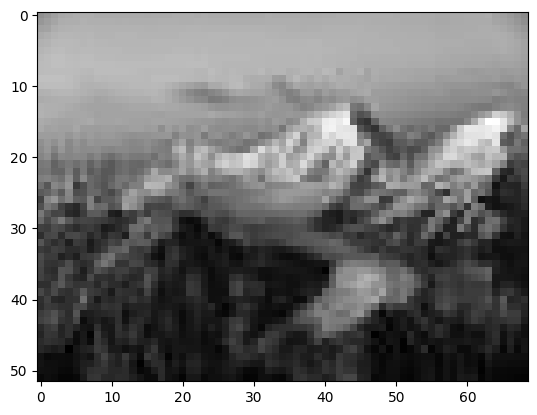

In [ ]:
plt.imshow(P, cmap = 'gray')

## Analysis

### Histogram Analysis

In [ ]:
def HistogramAnalysis(image):

    hist = cv2.calcHist(numpy.uint8(image),[0],None,[256],[0,256])

    plt.hist(image.ravel(),256,[0,256])
    plt.xlabel("pixel value")
    plt.ylabel("frequency")
    plt.show()

    mean = sum(hist) / len(hist)

    add = 0

    for i in range(len (hist)):
        #print(i)
        add += (hist[i] - mean) ** 2

    sigma = math.sqrt( (1/256) * add)
    return sigma

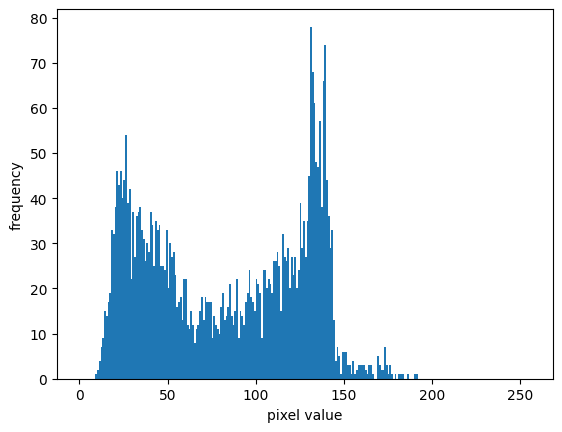

2.2451339661318443


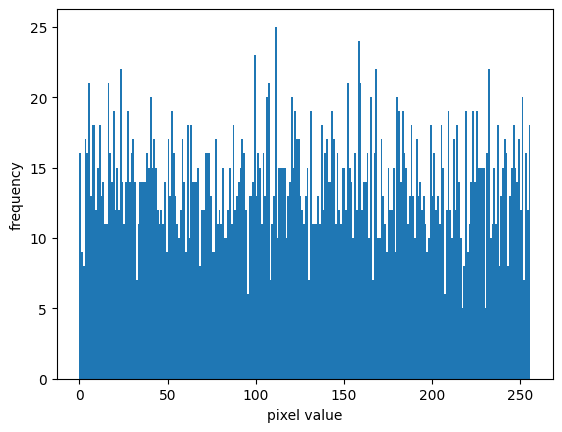

0.5534068623295499


In [ ]:
print(HistogramAnalysis(P))
print(HistogramAnalysis(C))

Histogram analysis is a statistical technique that involves the use of a histogram, which is a graphical representation of the distribution of a set of continuous data. The histogram is a bar chart that displays the frequencies of observations that fall within certain intervals or "bins" of the data range.The histogram patterns of plain image tend to have fluctuations, while the histogram patterns of cipher image are typically flat.

While evaluating MSE(Mean Squared Error) for both the plain image and cipher image that plain image have higher error showing the dependence between color values which is absent in cipher image

## Correlation Analysis

In [ ]:
def CorrelationAnalysis(image):
    x = []
    y = []
    for a in range(1000):
        i, j = numpy.random.randint(0, M-1), numpy.random.randint(0, N)
        plt.scatter(image[i,j],image[i+1,j],c='red', s=10)
        x.append(image[i, j])
        y.append(image[i+1, j])
    addxy = 0
    addx = 0
    addy = 0
    meanx, meany = sum(x)/len(x), sum(y)/len(y)
    for i in range(1000):
        addxy += (x[i] - meanx) * (y[i] - meany)
        addx += (x[i] - meanx) ** 2
        addy += (y[i]- meany) ** 2

    r = addxy / math.sqrt(addx * addy)
    return r

0.9509298663458081

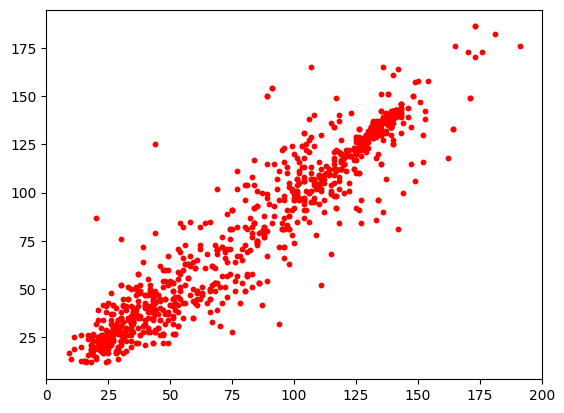

In [ ]:
CorrelationAnalysis(P)

0.056844260615488515

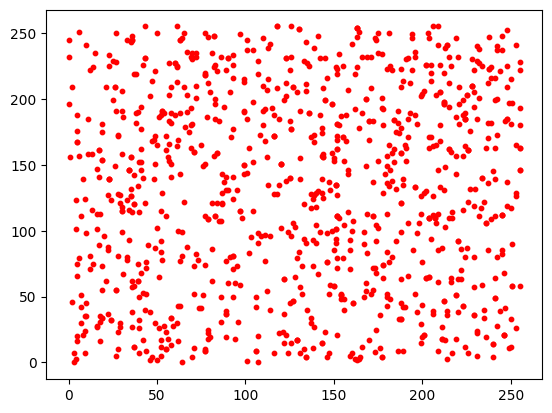

In [ ]:
CorrelationAnalysis(C)

Correlation analysis is a statistical technique used to measure the relationship or association between two or more variables. It quantifies the degree of linear relationship between variables, indicating how they move or vary together. Correlation analysis provides insights into the strength and direction of the relationship.

The plain image exhibits a high correlation along the horizontal axis. All the pixel values lie along the diagonal line whereas, for the cipher images  are scattered everywhere in the plot. To qualitatively express this behavior, the correlation coefficient is calculated among contiguous pixels. For plain images the coefficient is closer to 1, whereas for cipher images it is closer to 0. This implies that cipher images do not hold any correlation


### Information Entropy Analysis

In [ ]:
def Information_Entropy_Analysis(image):
    hist = cv2.calcHist(numpy.uint8(image),[0],None,[256],[0,256])
    e =  0
    for i in range(len(hist)):
        #print(math.log(hist[i] + 1, 2))
        e += hist[i] * math.log(hist[i] + 1, 2)
    e *= -1
    return e

Information_Entropy_Analysis(P)

array([-267.93414], dtype=float32)

In [ ]:
Information_Entropy_Analysis(C)

array([-84.86916], dtype=float32)

Information entropy analysis is a method used to quantify the amount of uncertainty or randomness present in a set of data or information. It measures the average amount of information or surprise contained in each data point or symbol within a dataset. Higher entropy values indicate greater randomness or uncertainty, while lower entropy values indicate more predictability or structure in the data.

The information entropy is evaluated for plain image and cipher image. Plain image represents a lower entropy value than that of cipher image, which has higher entropy.


### NPCR

In [ ]:
def pixelsum(image1, image2):
    matrix = numpy.zeros(shape=(image1.shape[0], image1.shape[1]))
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            matrix[i,j] = (0 if image1[i,j] == image2[i,j] else 1)
    add = 0
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            add += matrix[i, j]
    return add

def NPCR(cipher, C):
    return ((pixelsum(cipher, C)/(cipher.shape[0]*cipher.shape[1]))*100)

Number of Pixel Change Rate(NPCR) measures the percentage of changed pixels between two cipher images generated by encrypting the same plain image with slightly different keys. A higher NPCR value indicates a greater degree of pixel diffusion and sensitivity to key changes, which are desirable properties in image encryption algorithms.


### UACI

In [ ]:
def pixeldifference(img1, img2):
    M,N = imageshape(img1)
    add = 0
    for i in range(M):
        for j in range(N):
            add += abs(img1[i, j] - img2[i, j])
    return add

def UACI(cipher, C):
    return (pixeldifference(cipher, C) / (255 * M * N))* 100

Unified Average Changed Intensity(UACI) measures the average intensity difference between corresponding pixels in two cipher images generated by encrypting the same plain image with slightly different keys. A lower UACI value indicates a higher level of diffusion and better resistance to attacks, which are desirable characteristics for image encryption algorithms

### Key Sensitivity Analysis

In [ ]:
def KeySensitivity_Analysis(key, plain, cipher):
    i = numpy.random.randint(len(key))
    #print(i)
    #print(key)
    key[i] = (0 if key[i] == 1 else 0)
    #print(key)
    X, Y = KeyExpansion(key)
    R = Diffussion1(plain, X)
    E = SelfConfussion(R, Y)
    C = diffussion2(E, X)
    npcr = NPCR(cipher, C)
    uaci = UACI(cipher, C)
    return npcr, uaci
KeySensitivity_Analysis(key, P, C)

(99.5819397993311, 33.81358340437624)

Key sensitivity analysis is a technique used to assess the impact of changes or variations in input parameters, commonly referred to as "keys," on the output or results of a model, system, or process. It helps in understanding the sensitivity or responsiveness of the output to different values or levels of the key variables. By systematically varying the key parameters and observing their effect on the output, key sensitivity analysis provides insights into which variables have the most significant influence on the outcome and which ones are less critical. These values implies that this algorithm is sensitive for the key K

### Equivalent Keystream Sensitivity Analysis

In [ ]:
def Equivalent_Keystream_Sensitivity_Analysis_X(key, plain, cipher):
    X, Y = KeyExpansion(key)
    i, j = numpy.random.randint(M), numpy.random.randint(N)
    X[i, j] = (X[i, j] + numpy.random.randint(255)) % 255
    R = Diffussion1(plain, X)
    E = SelfConfussion(R, Y)
    C = diffussion2(E, X)
    npcr = NPCR(cipher, C)
    uaci = UACI(cipher, C)
    return npcr, uaci
Equivalent_Keystream_Sensitivity_Analysis_X(key, P, C)

(99.6098104793757, 33.746147288346776)

In [ ]:
def Equivalent_Keystream_Sensitivity_Analysis_Y(key, plain, cipher):
    X, Y = KeyExpansion(key)
    i, j = numpy.random.randint(M), numpy.random.randint(N)
    Y[i, j] = (Y[i, j] + numpy.random.randint(255)) % 255
    R = Diffussion1(plain, X)
    E = SelfConfussion(R, Y)
    C = diffussion2(E, X)
    npcr = NPCR(cipher, C)
    uaci = UACI(cipher, C)
    return npcr, uaci
Equivalent_Keystream_Sensitivity_Analysis_Y(key, P, C)

(99.5819397993311, 33.8092115329967)

Analyses of Equivalent Keystream Sensitivity is a method used to assess the sensitivity of a cryptographic system's keystream to changes in the key. It involves analyzing the impact of variations or perturbations in the key on the generated keystream. By systematically altering the key and observing the resulting changes in the keystream, analysis of equivalent keystream sensitivity helps determine how sensitive the keystream is to key variations. These values implies that this algorithm is sensitive for the random matrices X and Y


### Plaintext Sensitivity Analysis

In [ ]:
def Plaintext_Sensitivity_Analysis(key, plain, cipher):
    M,N = imageshape(plain)
    i, j = numpy.random.randint(M), numpy.random.randint(N)
    plain[i, j] = (plain[i, j] + numpy.random.randint(255)) % 255
    X, Y = KeyExpansion(key)
    R = Diffussion1(plain, X)
    E = SelfConfussion(R, Y)
    C = diffussion2(E, X)
    npcr = NPCR(cipher, C)
    uaci = UACI(cipher, C)
    return npcr, uaci
Plaintext_Sensitivity_Analysis(key, P, C)

(99.63768115942028, 34.20322644107811)

Plaintext sensitivity analysis is a method used to evaluate the sensitivity of a cryptographic system to changes in the plaintext input. It involves analyzing the impact of variations or perturbations in the plaintext on the resulting ciphertext. By systematically altering the plaintext and observing the corresponding changes in the ciphertext, plaintext sensitivity analysis helps determine how sensitive the cryptographic system is to variations in the input data. These values imply that this algorithm is sensitive for even minute change in plain image P


### Ciphertext Sensitivity Analysis

In [ ]:
def Ciphertext_Sensitivity_Analysis(key, plain, cipher):
    M,N = imageshape(plain)
    i, j = numpy.random.randint(M), numpy.random.randint(N)
    cipher[i, j] = (cipher[i, j] + numpy.random.randint(255)) % 255
    X, Y = KeyExpansion(key)
    E = reverse_Diffusion2(cipher, X)
    R = reverse_SelfConfussion(E, Y)
    P = reverse_diffusion1(R, X)
    npcr = NPCR(plain, P)
    uaci = UACI(plain, P)
    return npcr, uaci
Ciphertext_Sensitivity_Analysis(key, P, C)

C:\Users\sanja\AppData\Local\Temp\ipykernel_12980\4242946719.py:27: RuntimeWarning: overflow encountered in ubyte_scalars
  D[i, j] = (D[i, j] - V[i, j]) % 16
C:\Users\sanja\AppData\Local\Temp\ipykernel_12980\3520871486.py:18: RuntimeWarning: overflow encountered in long_scalars
  Q[i, j] = (R[i, j] * modInverse(R[i-1, j], 257) * modInverse(R[i, j-1], 257) * modInverse(Z[i, j], 257))% 257


(5.657748049052397, 1.5546374625658512)

Ciphertext sensitivity analysis is a method used to evaluate the sensitivity of a cryptographic system to changes in the ciphertext. It involves analyzing the impact of variations or perturbations in the ciphertext on the corresponding plaintext or decryption output. By systematically modifying the ciphertext and observing the resulting changes in the decrypted output, ciphertext sensitivity analysis helps determine how sensitive the cryptographic system is to alterations in the ciphertext. These values implies that this algorithm is sensitive for Cipher image C in decryption process.
